In [70]:
import numpy as np #numerical computations
import pandas as pd #dataframes
from sklearn.model_selection import train_test_split #testing model
from sklearn import preprocessing #scaling, transforming, wrangling data
from sklearn.ensemble import RandomForestRegressor #random forest model family

from sklearn.pipeline import make_pipeline #cross-validation
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score #model performance evaluation

from sklearn.externals import joblib #model persistence

In [71]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url)

In [134]:
print (data.head())
data.head()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
data = pd.read_csv(dataset_url, sep=';') #separated by ';'' instead of default ','
print (data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [74]:
print (data.shape) #(number of samples, number of features)

(1599, 12)


In [75]:
print (data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [76]:
y = data.quality #y = target
X = data.drop('quality', axis=1) # X = input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify =y) #stratify training set looks similar to test set

In [77]:
x_train_scaled = preprocessing.scale(X_train)
print (x_train_scaled.mean(axis=0))
print (x_train_scaled.std(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [78]:
scaler = preprocessing.StandardScaler().fit(X_train) #scaling data

In [79]:
X_train_scaled = scaler.transform(X_train)
print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [80]:
X_test_scaled = scaler.transform(X_test)
print (X_test_scaled.mean(axis=0)) #not centered perfectly at 0
print (X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


In [81]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100)) #whole pipeline

In [82]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))], 'verbose': False, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
           

In [83]:
hyperparameters = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth':[None, 5,3,1]}

In [84]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [85]:
print (clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}


In [86]:
print(clf.refit)

True


In [87]:
y_pred = clf.predict(X_test)

In [88]:
print (r2_score(y_test, y_pred))

0.4727768024698832


In [89]:
print (mean_squared_error(y_test, y_pred))

0.34020312500000005


In [90]:
joblib.dump(clf,'rf_regressor.pkl')

['rf_regressor.pkl']

In [91]:
clf2 = joblib.load('rf_regressor.pkl')
clf2.predict(X_test)

array([6.57, 5.81, 5.05, 5.57, 6.5 , 5.69, 4.81, 4.69, 5.01, 6.11, 5.22,
       5.69, 5.88, 4.96, 5.78, 5.59, 6.69, 5.79, 5.74, 7.  , 5.57, 5.56,
       4.98, 6.16, 5.96, 5.05, 5.61, 5.1 , 6.  , 5.96, 5.84, 6.51, 5.96,
       5.01, 4.91, 5.96, 5.04, 5.68, 5.05, 5.91, 4.83, 5.96, 6.79, 5.05,
       6.17, 5.4 , 5.57, 5.55, 5.08, 6.52, 5.91, 5.23, 5.84, 5.15, 5.62,
       5.86, 5.24, 5.26, 4.95, 5.27, 5.42, 5.01, 5.02, 5.91, 6.06, 5.35,
       6.35, 5.02, 5.14, 6.56, 5.75, 5.5 , 5.05, 5.05, 5.36, 5.96, 5.33,
       5.02, 5.27, 5.23, 6.55, 5.53, 6.27, 6.63, 5.06, 5.94, 6.55, 6.17,
       5.51, 5.8 , 5.83, 5.33, 6.38, 5.63, 5.76, 5.73, 6.65, 6.81, 5.55,
       6.88, 5.12, 5.5 , 5.1 , 6.58, 5.06, 4.53, 5.66, 4.97, 5.77, 5.98,
       5.84, 5.54, 6.15, 5.44, 5.01, 5.17, 5.88, 5.05, 4.79, 6.1 , 5.83,
       5.07, 5.84, 5.93, 5.23, 5.35, 5.21, 5.89, 5.48, 5.35, 5.8 , 6.17,
       5.06, 5.29, 5.03, 6.34, 5.05, 5.07, 6.72, 5.53, 5.2 , 5.09, 5.7 ,
       6.1 , 5.29, 5.51, 5.14, 6.51, 5.53, 5.05, 5.

In [92]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

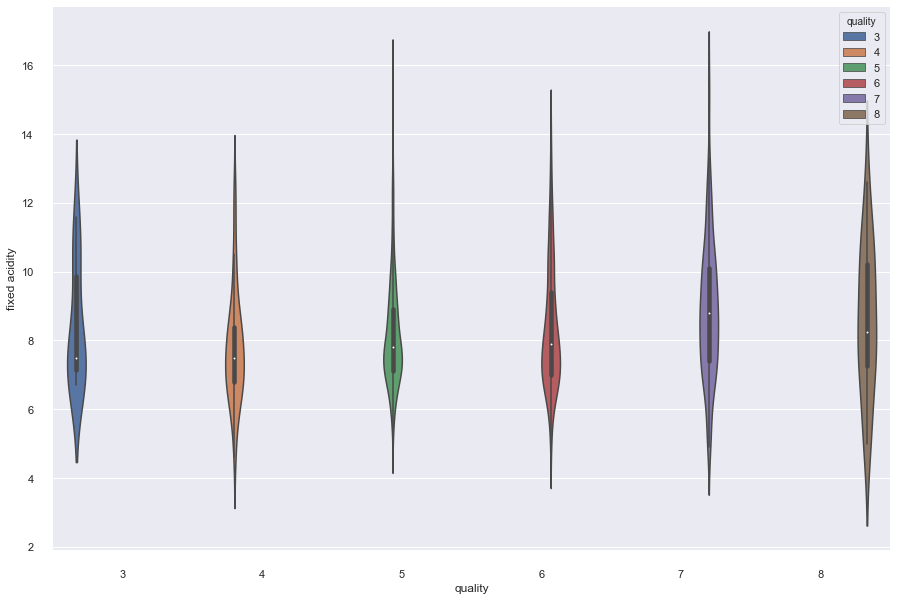

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="quality",y="fixed acidity", hue="quality", data=data);
sns.despine(offset=10, trim=True)

In [94]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [95]:
data[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
newWine = data[:1]

In [97]:
newWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
print(newWine)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


In [99]:
newWine.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [104]:
newWineResult = clf2.predict(X_test[:5])
print(newWineResult)

[6.57 5.81 5.05 5.57 6.5 ]


In [105]:
X_test[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
797,9.3,0.370,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8
871,6.9,0.560,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1463,6.9,0.630,0.01,2.4,0.076,14.0,39.0,0.99522,3.34,0.53,10.8
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6


In [122]:
X_1 = data.drop('quality', axis=1) # X = input features
X_1[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [124]:
newWineResult = clf2.predict(X_1[:1])
print(newWineResult)

[5.05]


In [137]:
X_new = pd.read_csv('./winequality.csv', sep=';')
X_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [142]:
X_new = pd.read_csv('./winequality.csv', sep=';')
X_new.head()

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality";
7.6  0.60 0.00 1.6 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5                                                                                                                         
7.8  0.88 0.00 2.6 0.098 25.0 67.0 0.9968 3.20 0.68 9.8                                                  5                                                                                                                         
     0.76 0.04 2.3 0.092 15.0 54.0 0.9970 3.26 0.65 9.8                                                  5                                                                                                                         
11.2 0.28 0.56 1.9 0.075 17.0 60.0 0.9980 3.16 0.58 9.8                                                  6                                                                                                                         
7.4  0.70 0.00 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5

In [139]:
newWineResult = clf2.predict(X_new)
print(newWineResult)

ValueError: non-broadcastable output operand with shape (1599,1) doesn't match the broadcast shape (1599,11)